El archivo diabetes.csv proviene del Instituto Nacional de Enfermedades
Diabetológicas, Digestivas y Nefrológicas de los Estados Unidos. El objetivo
de la base de datos es predecir si un paciente tiene o no diabetes, en base a
ciertas mediciones diagnósticas incluidas en el conjunto de datos. Este es
un subconjunto de una base de datos mucho más grande. Aquí se han
seleccionado solo mujeres con edad mayor o igual a 21, descendientes del
pueblo indígena Pima.

Las variables disponibles son las siguientes:

● Pregnancies: número de veces embarazada.

● Glucose: concentración de glucosa en plasma 2 horas en una prueba de
tolerancia a la glucosa oral.

● BoodPressure: presión arterial diastólica (mm Hg).

● SkinThickness: espesor de pliegue de la piel de los tríceps (mm).

● Insulin: insulina sérica de 2 horas (MU u/ml).

● BMI: índice de masa corporal (peso en kg/(altura en m)^2).


● DiabetesPedigreeFunction: Función de pedigrí de diabetes (DPF). Cálculo
de una probabilidad de diabetes en función de la edad y de la historia
diabética familiar.

● Age: edad en años.

● Outcome: variable categórica que indica si tiene un paciente tiene
diabetes o no tiene diabetes


1. Cargue los datos y muestre los primeros 6 registros. Identifique qué
variable(s) es(son) numérica(s) y qué variable(s) es(son) categórica(s).


In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('diabetes.csv')
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Convertir 'Outcome' a una variable categórica
df['Outcome'] = df['Outcome'].astype('category')

# Identificar las variables numéricas y categóricas
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns
variables_categoricas = df.select_dtypes(include=['object', 'category']).columns

# Imprimir las variables numéricas
print("Variables numéricas:")
for variable in variables_numericas:
    print(" -", variable)

# Imprimir las variables categóricas
print("\nVariables categóricas:")
for variable in variables_categoricas:
    print(" -", variable)

Variables numéricas:
 - Pregnancies
 - Glucose
 - BloodPressure
 - SkinThickness
 - Insulin
 - BMI
 - DiabetesPedigreeFunction
 - Age

Variables categóricas:
 - Outcome


2. Separe el conjunto de datos en un conjunto de variables predictoras y otro
con la variable respuesta.


In [7]:
# Separar el conjunto de datos en variables predictoras (X) y variable respuesta (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Imprimir las primeras filas de X
print("Primeras filas de las variables predictoras:")
print(X.head())

# Imprimir las primeras filas de y
print("\nPrimeras filas de la variable respuesta:")
print(y.head())

Primeras filas de las variables predictoras:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Primeras filas de la variable respuesta:
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]


3. A partir de lo anterior, genere conjuntos de datos de entrenamiento y de
prueba, separando un 25% de los datos para fines de prueba.

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Imprimir el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 576
Tamaño del conjunto de prueba: 192


4. Cree un modelo de Regresión Logística (con una semilla igual a 10 para
fines de replicabilidad) y ajuste el modelo a los datos de entrenamiento. En
este punto es posible que tenga problemas de convergencia del algoritmo.
Si es así, intente incrementar el número de iteraciones del algoritmo
(max_iter) o probar con un solucionador distinto (solver).

In [9]:
# Crear el modelo de Regresión Logística
modelo = LogisticRegression(random_state=10, max_iter=1000)

# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=10)

5. Genere predicciones con los datos de las variables predictoras del
conjunto de datos de prueba.


In [10]:
# Generar predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

# Imprimir todas las predicciones
print("Todas las predicciones:")
print(y_pred)

Todas las predicciones:
[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0]


6. Muestre la matriz de confusión como un objeto numpy.ndarray.

In [12]:
from sklearn.metrics import confusion_matrix
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(matriz_confusion)

Matriz de confusión:
[[95 28]
 [25 44]]


7. Grafique la matriz de confusión usando un mapa de calor (Heatmap).

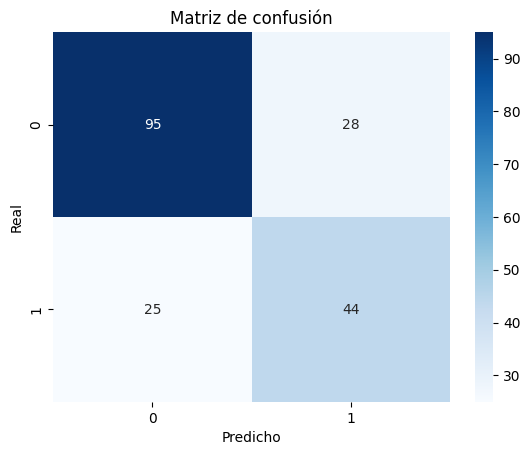

In [13]:
# Crear un mapa de calor con la matriz de confusión
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')

# Agregar títulos y etiquetas
plt.title('Matriz de confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')

# Mostrar el gráfico
plt.show()

8. Genere las métricas de evaluación a este problema de clasificación.
Comente los resultados.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Métricas de evaluación:")
print(" - Precisión: ", accuracy)
print(" - Exactitud: ", precision)
print(" - Sensibilidad: ", recall)
print(" - Puntuación F1: ", f1)

Métricas de evaluación:
 - Precisión:  0.7239583333333334
 - Exactitud:  0.6111111111111112
 - Sensibilidad:  0.6376811594202898
 - Puntuación F1:  0.624113475177305


9. Genere la curva ROC y la métrica AUC. Comente los resultados

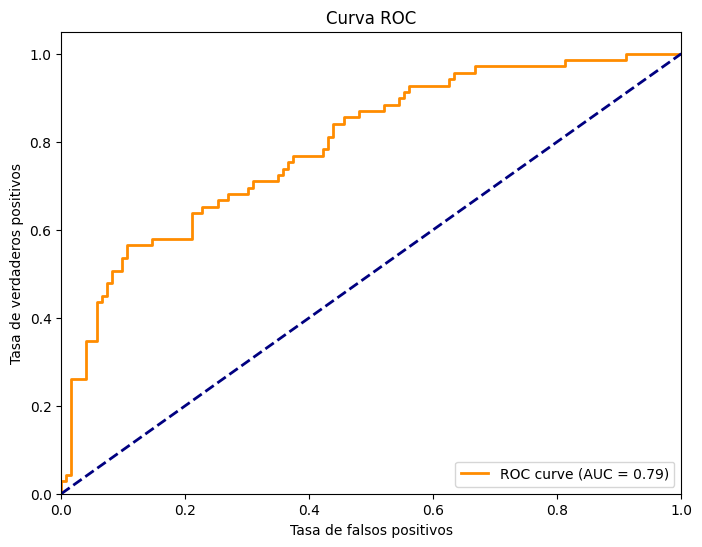

In [17]:
from sklearn.metrics import roc_curve, auc
# Calcular las tasas de verdaderos y falsos positivos
fpr, tpr, _ = roc_curve(y_test, modelo.predict_proba(X_test)[:, 1])

# Calcular la métrica AUC
roc_auc = auc(fpr, tpr)

# Crear el gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()

10. En la curva ROC, ¿qué cree usted que representaría una línea recta entre
el origen (0, 0) y el punto (1, 1)?



En la curva ROC, una línea recta entre el origen (0, 0) y el punto (1, 1) representa un clasificador aleatorio. Esto significa que el modelo no tiene ninguna capacidad de discriminación y clasifica los ejemplos positivos y negativos al azar. En términos de la métrica AUC, esto correspondería a un valor de 0.5.